In [1]:
import re
import json
import pandas as pd
import numpy as np
from tweet import config
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import combinations

In [2]:
# Read in data
df = pd.read_csv(config.data / 'covid19_tweets_final.csv')
df['senti'] = (np.where(df['sentiment_tag_hf']=="NEGATIVE", -1, 1)) * df['sentiment_score_hf']
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['date'] = df['date'].dt.date

In [3]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,full_text,...,hour,tweet_length,sentiment_tag_hf,sentiment_score_hf,sentiment_score_tb,subjectivity_score_tb,sentiment_score_nltk,id,senti,month
0,Taya ❤,NaN,I don't follow back,2011-10-01 05:55:50,283,0,8324,False,2020-01-27,Wildfires\nWar\nTaal Erruption\nJadine's break...,...,0,112,NEGATIVE,0.997167,0.0,0.00,-0.7430,0,-0.997167,1
1,Eric Ng,Hong Kong,"Hong Kong-based senior business reporter, Sout...",2015-02-23 12:28:27,1000,191,1,True,2020-01-27,Wuhan virus shot in the arm for health care st...,...,0,102,NEGATIVE,0.999039,0.0,0.00,-0.0516,1,-0.999039,1
2,Greg Folkers,"Washington, D.C., U.S.A.","Washington, DC",2009-05-21 17:03:17,4188,178,875,False,2020-01-27,.@bioRxiv: Transmission dynamics of 2019 novel...,...,0,137,NEGATIVE,0.980284,0.0,0.00,0.5267,2,-0.980284,1
3,Deplorable Chump Texanon,"Texas, USA","God, Family, Country. God Wins! I love my won...",2009-03-26 20:31:39,675,987,3491,False,2020-01-27,"BREAKING: Coronavirus Hits 15% Fatality Rate, ...",...,0,212,NEGATIVE,0.971413,0.0,0.45,-0.7430,3,-0.971413,1
4,Luke Waltham⁷,contactlukewaltham@gmail.com,22. Bisexual. Queer. He/They. Intersectional F...,2012-09-09 00:19:29,220029,9268,233087,True,2020-01-27,I find it disgustingly ironic that people are ...,...,0,275,NEGATIVE,0.993612,0.0,0.18,-0.9524,4,-0.993612,1


In [4]:
# Extract json data for sentiment analysis
senti_json = {'month_df': [], 'day_df': []}

month_df = df.groupby('month').agg({'senti':'mean', 'full_text':'count'}).reset_index()
for idx, row in month_df.iterrows():
    item = {'id': idx, 'month':row.month, 'senti':row.senti, 'count':row.full_text}
    senti_json['month_df'].append(item)

day_df = df.groupby('date').agg({'senti':'mean', 'full_text':'count'}).reset_index()
day_df['date'] = pd.to_datetime(day_df['date'])
day_df['weekday'] = day_df['date'].dt.weekday

for idx, row in day_df.iterrows():
    item = {'id': idx, 'date':str(row.date.date()), 'senti':row.senti, 'count':row.full_text, 'weekday':row.weekday}
    senti_json['day_df'].append(item)   

# Save json to disk
save_path = config.data / 'senti_data'
if not save_path.exists():
    save_path.mkdir()
with open(save_path / 'senti_data.json', 'w') as outfile:
    json.dump(senti_json, outfile)

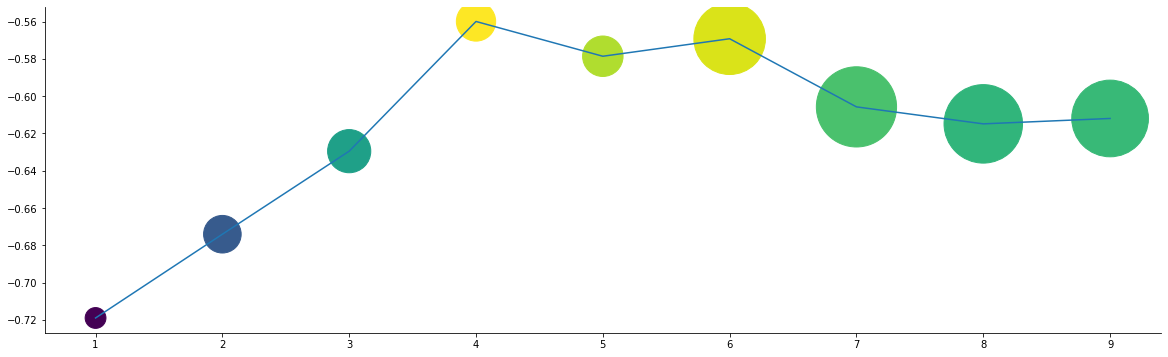

In [5]:
plt.figure(figsize=(20,6))
plt.plot(month_df['month'], month_df['senti'])
plt.scatter(month_df['month'], month_df['senti'], c=month_df['senti'], s=month_df['full_text']/3)
sns.despine()

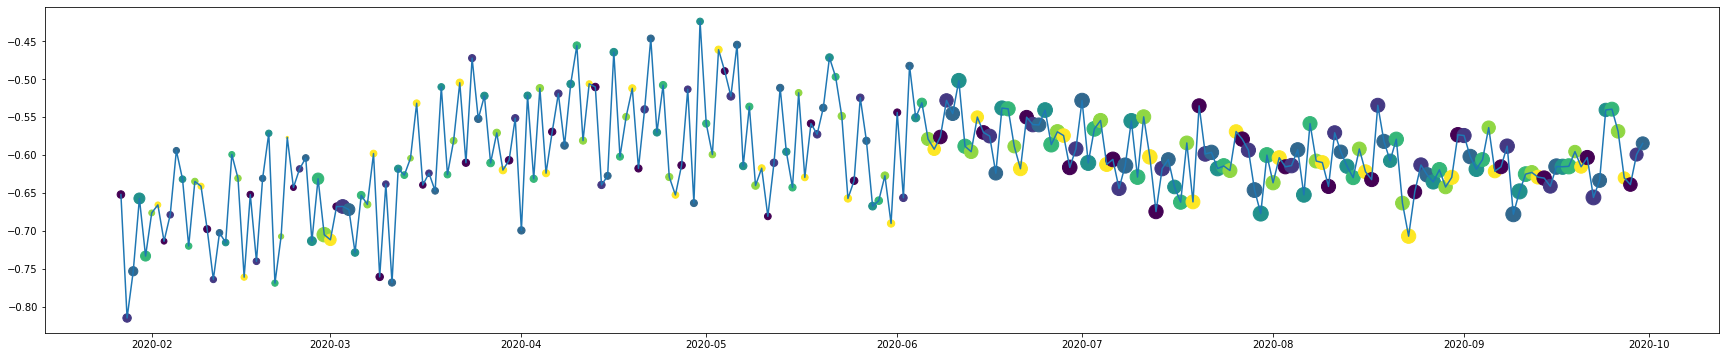

In [6]:
plt.figure(figsize=(30,6))
plt.plot(day_df['date'], day_df['senti'])
plt.scatter(day_df['date'], day_df['senti'], s=day_df['full_text']/3, c=day_df['weekday'])